## Exploring Flight Delays: A Data Modeling and Analysis Approach for Predicting Causes for Delays in Airline On-time Data

## Names

* Aditya Tomar
* Shay Samat
* Akhil Vasanth


<a id='Introduction'></a>
# Introduction

* Define the real problem and explain its motivation
Identify the dataset you will use and explain its key characteristics.
Explain at least one hypothesis that you will test.



## Methods

Identify the data analysis approach you will use and explain the rationale/motivation for your choice of this approach. Clearly state whether you are focusing on prediction or inference. Explain why the model class you have chosen is appropriate for the data and questions in your project.

We are using Logistic Regression with sigmoid function and KNN

# Results


* Model selection. You MUST compare at least 2 models, using cross-validation, regularization, and/or other relevant techniques.
* Model estimation. What are the final parameter estimates? What is the final accuracy of the model’s predictions?


# Conclusions and discussion

What can you conclude about your hypothesis? (Note that negative or ambiguous results are perfectly acceptable, you just need to explain what you found.) What are some potential implications/next steps for researchers interested in this topic?

# Rubric

Introduction and hypotheses
Introduction explaining the motivation/significance of the project. Identify and explain the dataset you will use, including clearly stating the number of observations (n) and predictors (p). Explain at least one hypothesis that you will test.

Methods - cross-validation
Explain what form of cross-validation you will use. Give a clear explanation, including any procedures you will use for randomizing the order of observations, splitting testing and training sets. It is NOT sufficient to simply reference a Python library; you must explain how the library actually performs the cross-validation.

Methods
Identify the data analysis approach you will use and explain the rationale/motivation for your choice of this approach. Clearly state whether you are focusing on prediction or inference. Explain why the model class you have chosen is appropriate for the data and questions in your project.

Results - model selection
Your results must include at least two different models or analyses of the same data, with an objective comparison/evaluation of the relative merit of the two approaches. You must use cross-validation for this model comparison. Note that the models you compare can be very similar, e.g. fitting a regression with 2 explanatory (independent) variables vs. 3 variables. Show a graph or table (as appropriate) to illustrate the objective model comparison you performed, and explain why you chose the final model. This section should discuss the complexity/flexibility of the different models. You should also discuss whether any of the models you studied showed evidence of overfitting.

Results - model estimation
What are the final parameter estimates (obtained using the full dataset)? What is the final accuracy of the model’s predictions?

Include at least one figure to visualize your results. Your figure should be fully labeled and self-explanatory, with axis labels and a figure legend.

Discussion
What can you conclude about your hypothesis? (Note that negative or ambiguous results are perfectly acceptable, you just need to explain what you found.) What are some potential implications/next steps for researchers interested in this topic?



# Preprocessing

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import logit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [2]:
csv_files = []
years = [2018, 2019, 2022]
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

for year in years:
    for month in months:
        csv_file = "data/{:02d}_{}.csv".format(int(month), year)
        csv_files.append(csv_file)

dfs = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file, low_memory=False)
    dfs.append(df)

flights = pd.concat(dfs, ignore_index=True)
flights.head()


,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,DEP_DELAY_NEW,ARR_DELAY_NEW,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ORIGIN_STATE_NM,DEST_STATE_NM
0,1/1/2018 12:00:00 AM,9E,"Albany, GA",GA,"Atlanta, GA",GA,0.0,0.0,54.0,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2018 12:00:00 AM,9E,"Albany, GA",GA,"Atlanta, GA",GA,0.0,0.0,55.0,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/1/2018 12:00:00 AM,9E,"Alexandria, LA",LA,"Atlanta, GA",GA,0.0,0.0,92.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/1/2018 12:00:00 AM,9E,"Alexandria, LA",LA,"Atlanta, GA",GA,39.0,23.0,89.0,500.0,0.0,0.0,0.0,0.0,23.0,NaN,NaN
4,1/1/2018 12:00:00 AM,9E,"Appleton, WI",WI,"Minneapolis, MN",MN,0.0,0.0,65.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flights.columns

Index(['FL_DATE', 'OP_UNIQUE_CARRIER', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEP_DELAY_NEW', 'ARR_DELAY_NEW',
       'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'ORIGIN_STATE_NM',
       'DEST_STATE_NM'],
      dtype='object')

In [3]:
flights = flights.drop(["ORIGIN_STATE_ABR", "DEST_STATE_ABR","ORIGIN_STATE_NM","DEST_STATE_NM"], axis=1)
flights

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY_NEW,ARR_DELAY_NEW,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1/1/2018 12:00:00 AM,9E,"Albany, GA","Atlanta, GA",0.0,0.0,54.0,145.0,NaN,NaN,NaN,NaN,NaN
1,1/1/2018 12:00:00 AM,9E,"Albany, GA","Atlanta, GA",0.0,0.0,55.0,145.0,NaN,NaN,NaN,NaN,NaN
2,1/1/2018 12:00:00 AM,9E,"Alexandria, LA","Atlanta, GA",0.0,0.0,92.0,500.0,NaN,NaN,NaN,NaN,NaN
3,1/1/2018 12:00:00 AM,9E,"Alexandria, LA","Atlanta, GA",39.0,23.0,89.0,500.0,0.0,0.0,0.0,0.0,23.0
4,1/1/2018 12:00:00 AM,9E,"Appleton, WI","Minneapolis, MN",0.0,0.0,65.0,236.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21357352,12/31/2022 12:00:00 AM,YX,"Washington, DC","Raleigh/Durham, NC",0.0,0.0,71.0,227.0,NaN,NaN,NaN,NaN,NaN
21357353,12/31/2022 12:00:00 AM,YX,"Wilmington, NC","New York, NY",0.0,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN
21357354,12/31/2022 12:00:00 AM,YX,"Wilmington, NC","New York, NY",0.0,0.0,92.0,500.0,NaN,NaN,NaN,NaN,NaN
21357355,12/31/2022 12:00:00 AM,YX,"Wilmington, NC","Newark, NJ",0.0,0.0,100.0,488.0,NaN,NaN,NaN,NaN,NaN


In [4]:
flights['MONTH'] = [int(row.split('/')[0]) for row in flights['FL_DATE']]
flights['YEAR'] = [int(row.split('/')[2].split(' ')[0]) for row in flights['FL_DATE']]
print(flights['MONTH'], flights['YEAR'])

0            1
1            1
2            1
3            1
4            1
            ..
21357352    12
21357353    12
21357354    12
21357355    12
21357356    12
Name: MONTH, Length: 21357357, dtype: int64 0           2018
1           2018
2           2018
3           2018
4           2018
            ... 
21357352    2022
21357353    2022
21357354    2022
21357355    2022
21357356    2022
Name: YEAR, Length: 21357357, dtype: int64


In [5]:
delay_columns = [col for col in flights.columns if "DELAY" in col]
flights[delay_columns] = flights[delay_columns].fillna(0)

In [5]:
flights.describe()

,DEP_DELAY_NEW,ARR_DELAY_NEW,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,2.135736e+07,2.135736e+07,2.087206e+07,2.135736e+07,2.135736e+07,2.135736e+07,2.135736e+07,2.135736e+07,2.135736e+07
mean,1.395409e+01,1.392333e+01,1.368909e+02,8.052769e+02,4.330953e+00,7.182890e-01,2.813930e+00,2.135812e-02,5.039492e+00
std,4.729044e+01,4.693918e+01,7.270466e+01,5.951796e+02,3.068529e+01,1.370043e+01,1.648249e+01,1.501947e+00,2.544449e+01
min,0.000000e+00,0.000000e+00,1.400000e+01,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,8.400000e+01,3.700000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.190000e+02,6.440000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.000000e+00,8.000000e+00,1.670000e+02,1.041000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.433000e+03,3.423000e+03,1.604000e+03,5.095000e+03,3.423000e+03,2.692000e+03,1.848000e+03,1.245000e+03,2.454000e+03


In [8]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21357357 entries, 0 to 21357356
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_UNIQUE_CARRIER    object 
 2   ORIGIN_CITY_NAME     object 
 3   DEST_CITY_NAME       object 
 4   DEP_DELAY_NEW        float64
 5   ARR_DELAY_NEW        float64
 6   ACTUAL_ELAPSED_TIME  float64
 7   DISTANCE             float64
 8   CARRIER_DELAY        float64
 9   WEATHER_DELAY        float64
 10  NAS_DELAY            float64
 11  SECURITY_DELAY       float64
 12  LATE_AIRCRAFT_DELAY  float64
dtypes: float64(9), object(4)
memory usage: 2.1+ GB


In [6]:
flights['TOTAL_DELAY'] = flights['ARR_DELAY_NEW'] + flights['DEP_DELAY_NEW']

flights

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY_NEW,ARR_DELAY_NEW,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,MONTH,YEAR,TOTAL_DELAY
0,1/1/2018 12:00:00 AM,9E,"Albany, GA","Atlanta, GA",0.0,0.0,54.0,145.0,0.0,0.0,0.0,0.0,0.0,1,2018,0.0
1,1/1/2018 12:00:00 AM,9E,"Albany, GA","Atlanta, GA",0.0,0.0,55.0,145.0,0.0,0.0,0.0,0.0,0.0,1,2018,0.0
2,1/1/2018 12:00:00 AM,9E,"Alexandria, LA","Atlanta, GA",0.0,0.0,92.0,500.0,0.0,0.0,0.0,0.0,0.0,1,2018,0.0
3,1/1/2018 12:00:00 AM,9E,"Alexandria, LA","Atlanta, GA",39.0,23.0,89.0,500.0,0.0,0.0,0.0,0.0,23.0,1,2018,62.0
4,1/1/2018 12:00:00 AM,9E,"Appleton, WI","Minneapolis, MN",0.0,0.0,65.0,236.0,0.0,0.0,0.0,0.0,0.0,1,2018,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21357352,12/31/2022 12:00:00 AM,YX,"Washington, DC","Raleigh/Durham, NC",0.0,0.0,71.0,227.0,0.0,0.0,0.0,0.0,0.0,12,2022,0.0
21357353,12/31/2022 12:00:00 AM,YX,"Wilmington, NC","New York, NY",0.0,0.0,NaN,500.0,0.0,0.0,0.0,0.0,0.0,12,2022,0.0
21357354,12/31/2022 12:00:00 AM,YX,"Wilmington, NC","New York, NY",0.0,0.0,92.0,500.0,0.0,0.0,0.0,0.0,0.0,12,2022,0.0
21357355,12/31/2022 12:00:00 AM,YX,"Wilmington, NC","Newark, NJ",0.0,0.0,100.0,488.0,0.0,0.0,0.0,0.0,0.0,12,2022,0.0


In [7]:
delay_status = ['1' if (row > 0) else '0' for row in flights['TOTAL_DELAY']]
flights['DELAY_STATUS'] = delay_status

flights

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY_NEW,ARR_DELAY_NEW,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,MONTH,YEAR,TOTAL_DELAY,DELAY_STATUS
0,1/1/2018 12:00:00 AM,9E,"Albany, GA","Atlanta, GA",0.0,0.0,54.0,145.0,0.0,0.0,0.0,0.0,0.0,1,2018,0.0,0
1,1/1/2018 12:00:00 AM,9E,"Albany, GA","Atlanta, GA",0.0,0.0,55.0,145.0,0.0,0.0,0.0,0.0,0.0,1,2018,0.0,0
2,1/1/2018 12:00:00 AM,9E,"Alexandria, LA","Atlanta, GA",0.0,0.0,92.0,500.0,0.0,0.0,0.0,0.0,0.0,1,2018,0.0,0
3,1/1/2018 12:00:00 AM,9E,"Alexandria, LA","Atlanta, GA",39.0,23.0,89.0,500.0,0.0,0.0,0.0,0.0,23.0,1,2018,62.0,1
4,1/1/2018 12:00:00 AM,9E,"Appleton, WI","Minneapolis, MN",0.0,0.0,65.0,236.0,0.0,0.0,0.0,0.0,0.0,1,2018,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21357352,12/31/2022 12:00:00 AM,YX,"Washington, DC","Raleigh/Durham, NC",0.0,0.0,71.0,227.0,0.0,0.0,0.0,0.0,0.0,12,2022,0.0,0
21357353,12/31/2022 12:00:00 AM,YX,"Wilmington, NC","New York, NY",0.0,0.0,NaN,500.0,0.0,0.0,0.0,0.0,0.0,12,2022,0.0,0
21357354,12/31/2022 12:00:00 AM,YX,"Wilmington, NC","New York, NY",0.0,0.0,92.0,500.0,0.0,0.0,0.0,0.0,0.0,12,2022,0.0,0
21357355,12/31/2022 12:00:00 AM,YX,"Wilmington, NC","Newark, NJ",0.0,0.0,100.0,488.0,0.0,0.0,0.0,0.0,0.0,12,2022,0.0,0


# EDA

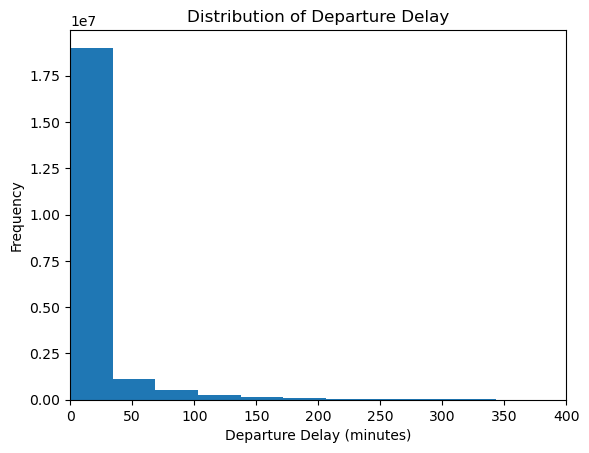

In [11]:
# Distribution of departure delay
plt.hist(flights['DEP_DELAY_NEW'], bins=100)
plt.xlim(0,400)
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Departure Delay')
plt.show()

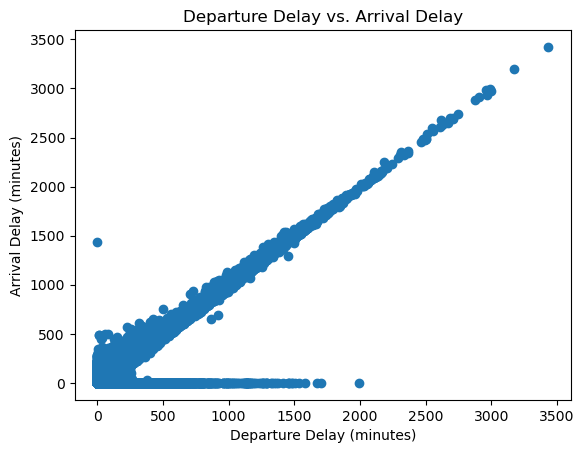

In [12]:
plt.scatter(flights['DEP_DELAY_NEW'], flights['ARR_DELAY_NEW'])
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Departure Delay vs. Arrival Delay')
plt.show()

In [13]:
avg_dep_delay_by_city = flights.groupby('ORIGIN_CITY_NAME')['DEP_DELAY_NEW'].mean()

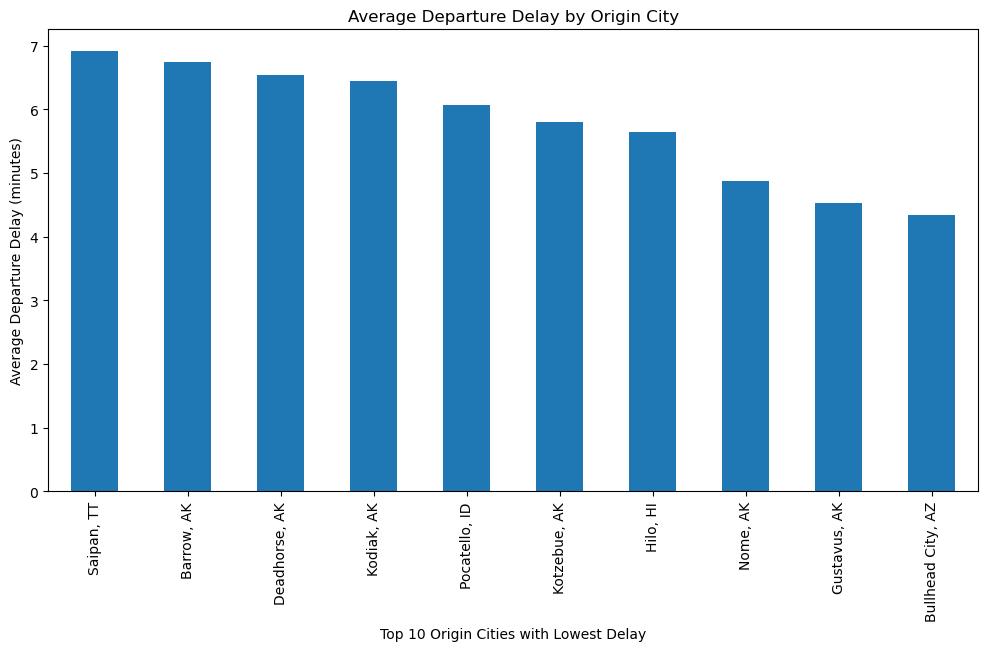

In [14]:
plt.figure(figsize=(12, 6))
avg_dep_delay_by_city.sort_values(ascending=False)[-10:].plot(kind='bar')
plt.xlabel('Top 10 Origin Cities with Lowest Delay')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Departure Delay by Origin City')
plt.show()

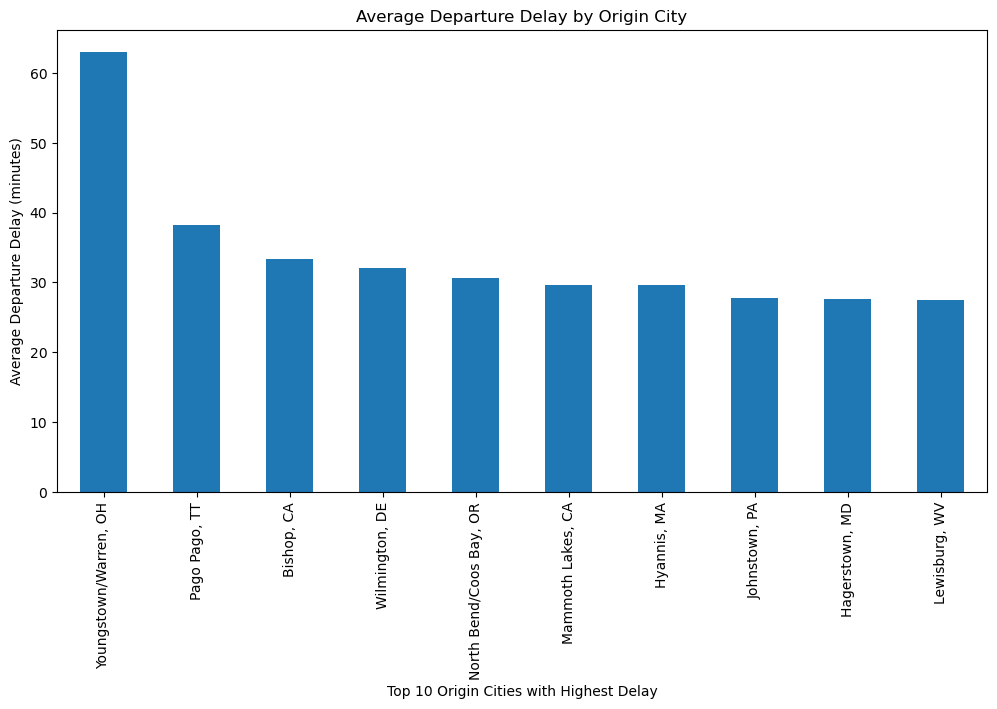

In [15]:
plt.figure(figsize=(12, 6))
avg_dep_delay_by_city.sort_values(ascending=False)[0:10].plot(kind='bar')
plt.xlabel('Top 10 Origin Cities with Highest Delay')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Departure Delay by Origin City')
plt.show()

In [16]:
correlation = flights[['TOTAL_DELAY', 'DISTANCE']].corr()
print(correlation)

             TOTAL_DELAY  DISTANCE
TOTAL_DELAY     1.000000  0.009457
DISTANCE        0.009457  1.000000


# Time series analysis - Total delay over time

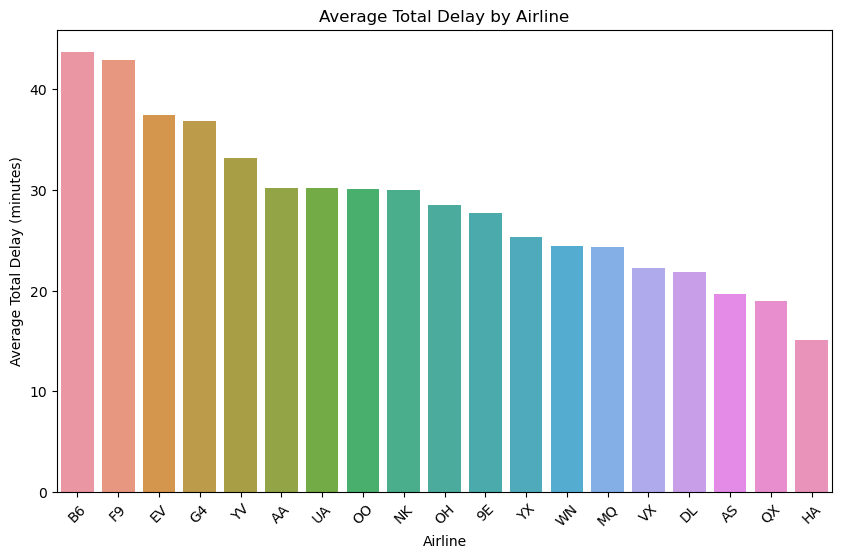

In [17]:
# Comparison analysis - Average total delay by airline
avg_delay_by_airline = flights.groupby('OP_UNIQUE_CARRIER')['TOTAL_DELAY'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_delay_by_airline.index, y=avg_delay_by_airline.values)
plt.xlabel('Airline')
plt.ylabel('Average Total Delay (minutes)')
plt.title('Average Total Delay by Airline')
plt.xticks(rotation=45)
plt.show()

# Scatter plot - Delay vs. distance

flights['Year'] = flights['FL_DATE'].dt.year
flights['Month'] = flights['FL_DATE'].dt.month

fig, axs = plt.subplots(nrows=len(flights['Year'].unique()), figsize=(12, 8), sharex=True, sharey=True)

for i, year in enumerate(flights['Year'].unique()):
    subset = flights[flights['Year'] == year]
    
    monthly_delay = subset.groupby('Month')['TOTAL_DELAY'].sum()
    flight_counts = subset['Month'].value_counts()
    
    monthly_mean_delay = monthly_delay / flight_counts
    
    axs[i].scatter(monthly_mean_delay.index, monthly_mean_delay.values)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Average Delay (minutes)')
    axs[i].set_title(f'Average Delay Over Time - {year}')
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    axs[i].set_xticks(range(1, 13))
    axs[i].set_xticklabels(months)

plt.suptitle('Mean Total Delay Over Time (Separated by Month and Year)')
plt.tight_layout()
plt.show()

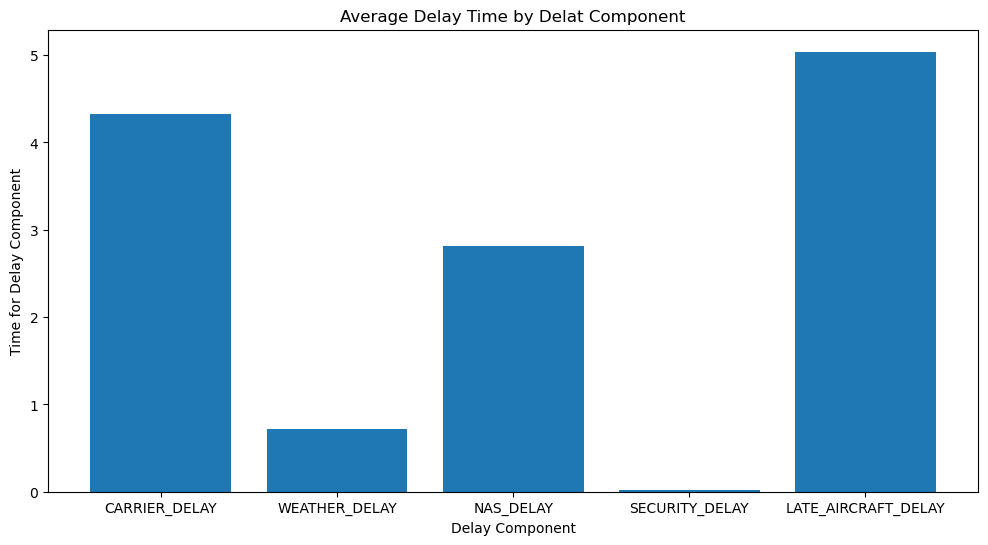

In [18]:
# Stacked bar plot - Delay components
delay_components = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
delay_sums = flights[delay_components].sum()
delay_components_times = []
for component in delay_components:
    delay_components_times.append(flights[component].mean())

plt.figure(figsize=(12, 6))
plt.bar(delay_components, delay_components_times)
plt.xlabel('Delay Component')
plt.ylabel('Time for Delay Component')
plt.title('Average Delay Time by Delat Component')
plt.show()

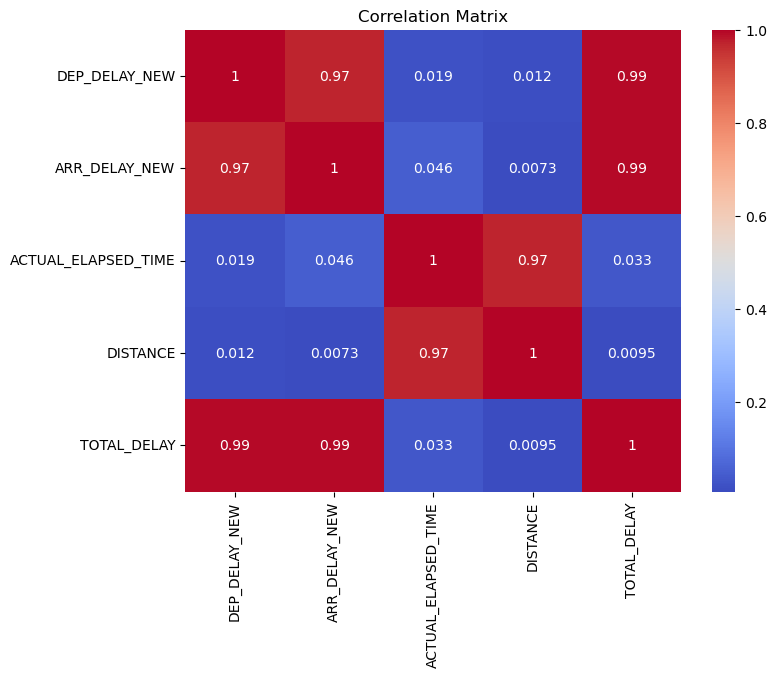

In [19]:
# Heatmap - Correlation matrix
correlation_matrix = flights[['DEP_DELAY_NEW', 'ARR_DELAY_NEW', 'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'TOTAL_DELAY']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Model Selection and Analysis

In [22]:
flights = flights.dropna()

# Get the top 20 most common cities in 'ORIGIN_CITY_NAME'
top_origin_cities = flights['ORIGIN_CITY_NAME'].value_counts().nlargest(25).index

# Get the top 20 most common cities in 'DEST_CITY_NAME'
top_dest_cities = flights['DEST_CITY_NAME'].value_counts().nlargest(25).index

# Filter the DataFrame to include only the data for the top origin cities and top destination cities
filtered_data = flights[(flights['ORIGIN_CITY_NAME'].isin(top_origin_cities)) & (flights['DEST_CITY_NAME'].isin(top_dest_cities))]



In [23]:
#random sample 500,000 datapoints
filtered_data = filtered_data.sample(n=50000, replace = False, random_state = 42)


filtered_data.shape


(50000, 17)


log_reg_model = logit('DELAY_STATUS~1+' + '+'.join(flights.columns[0:-2].values),data=flights).fit()
log_reg_model.summary()

In [24]:
#One hot Encoding of Categorical Data

# Perform one-hot encoding for 'ORIGIN_CITY_NAME' with the top origin cities
origin_city_encoded = pd.get_dummies(filtered_data['ORIGIN_CITY_NAME'], prefix='OriginCity')

# Perform one-hot encoding for 'DEST_CITY_NAME' with the top destination cities
dest_city_encoded = pd.get_dummies(filtered_data['DEST_CITY_NAME'], prefix='DestCity')

# Perform one-hot encoding for 'OP_UNIQUE_CARRIER'
carrier_encoded = pd.get_dummies(filtered_data['OP_UNIQUE_CARRIER'], prefix='Carrier')

# Perform one-hot encoding for 'MONTH'
month_encoded = pd.get_dummies(filtered_data['MONTH'], prefix='Month')

# Perform one-hot encoding for 'YEAR'
year_encoded = pd.get_dummies(filtered_data['YEAR'], prefix='YEAR')

# Concatenate the one-hot encoded columns with the original DataFrame
encoded_data = pd.concat([filtered_data, origin_city_encoded, dest_city_encoded, carrier_encoded, month_encoded,
                           year_encoded], axis=1)

# Drop the original categorical columns from the encoded DataFrame
encoded_data = encoded_data.drop(['ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'OP_UNIQUE_CARRIER'], axis=1)
delay_columns = [col for col in flights.columns if "DELAY" in col]
delay_columns.remove('DELAY_STATUS')
encoded_data = encoded_data.drop(columns=delay_columns, axis=1)
encoded_data = encoded_data.drop(columns=['FL_DATE', 'ACTUAL_ELAPSED_TIME', 'MONTH', 'YEAR'])


# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(encoded_data)
encoded_data

,DISTANCE,DELAY_STATUS,"OriginCity_Atlanta, GA","OriginCity_Baltimore, MD","OriginCity_Boston, MA","OriginCity_Charlotte, NC","OriginCity_Chicago, IL","OriginCity_Dallas/Fort Worth, TX","OriginCity_Denver, CO","OriginCity_Detroit, MI",...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,YEAR_2018,YEAR_2019,YEAR_2022
7371934,1325.0,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4138294,666.0,1,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
5406373,1313.0,0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
17271321,912.0,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
12208685,641.0,0,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19844501,258.0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2119572,740.0,0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
20555212,1235.0,0,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3274051,954.0,0,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False


In [25]:
#this is a subset of the random sample, just to make sure the model runs

test_run_sample = encoded_data.sample(n=1000, replace = False, random_state = 42)
test_run_sample

,DISTANCE,DELAY_STATUS,"OriginCity_Atlanta, GA","OriginCity_Baltimore, MD","OriginCity_Boston, MA","OriginCity_Charlotte, NC","OriginCity_Chicago, IL","OriginCity_Dallas/Fort Worth, TX","OriginCity_Denver, CO","OriginCity_Detroit, MI",...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,YEAR_2018,YEAR_2019,YEAR_2022
8344576,226.0,1,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
12359078,612.0,0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3311923,1389.0,0,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
21300414,529.0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
15918619,404.0,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306306,236.0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3831849,689.0,0,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
12495392,1014.0,0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
10180946,657.0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [26]:
# X = encoded_data
# y = encoded_data['DELAY_STATUS']

#if you're just testing to see if the models run:
X = test_run_sample.drop(columns=["DELAY_STATUS"])
y = test_run_sample['DELAY_STATUS']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_test

,DISTANCE,"OriginCity_Atlanta, GA","OriginCity_Baltimore, MD","OriginCity_Boston, MA","OriginCity_Charlotte, NC","OriginCity_Chicago, IL","OriginCity_Dallas/Fort Worth, TX","OriginCity_Denver, CO","OriginCity_Detroit, MI","OriginCity_Fort Lauderdale, FL",...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,YEAR_2018,YEAR_2019,YEAR_2022
4618592,236.0,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
19925008,2153.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
9708186,255.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7885859,666.0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2571545,1723.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032924,1990.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
6845622,1076.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
10921818,2248.0,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
10165088,2343.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [42]:
# Create the formula for logistic regression(MAY NOT USE)
formula = 'DELAY_STATUS ~ 1 + ' + ' + '.join(encoded_data.columns[11:])  # Adjust the column range if needed
log_reg_model = logit(formula, data=encoded_data).fit()
print(log_reg_model.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

In [27]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm_model = LinearSVC(C = 100)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(svm_model.coef_)
print( svm_model.intercept_)

Accuracy: 0.49
[[ 0.00053436  0.03399239 -0.02272266 -0.03584556  0.06921887  0.065821
   0.01504817  0.02177447 -0.0237284   0.00875126 -0.00385438  0.00026932
  -0.02766191 -0.00524492 -0.03225545  0.04674456 -0.11434644 -0.00234214
  -0.04608825 -0.00275752  0.00814077  0.01598513 -0.13683549  0.0176787
  -0.00767874  0.02346588  0.08433806  0.01428371 -0.04661779  0.01364242
  -0.0323232  -0.01601947  0.0203158   0.05428324 -0.02120985  0.03234501
   0.00435418 -0.08887405 -0.02106656 -0.01071024 -0.020333   -0.033592
   0.06657208  0.02400192 -0.02937218 -0.00783325 -0.01683623 -0.05189219
   0.00637217  0.00720676 -0.06550667 -0.04291911  0.04134753  0.00683959
  -0.02834754  0.08998933  0.          0.00760865  0.00300188 -0.02026288
   0.01199064  0.02960595 -0.15743701  0.02017702  0.04205672 -0.00738108
   0.00877869 -0.02926416 -0.11025555  0.0406928  -0.08818582  0.06903865
  -0.10287824 -0.04438026  0.05047135 -0.02145852 -0.0165352  -0.07393186
  -0.00373185  0.04091347  0

c:\Users\akhil\anaconda3\envs\env38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Convert label values in y_test to integers
y_test2 = y_test.astype(int)

# Convert y_pred to match the format of y_test
y_pred2 = y_pred.astype(int)

# Calculate precision
precision = precision_score(y_test2, y_pred2, pos_label=1)

# Calculate recall
recall = recall_score(y_test2, y_pred2, pos_label=1)

# Calculate F1 score
f1 = f1_score(y_test2, y_pred2)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.486187789946194
Recall: 0.9984361818144406
F1 score: 0.6539399738547997


In [24]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm_model = LinearSVC(C = 0.001)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(svm_model.coef_)
print( svm_model.intercept_)

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.50333
[[ 0.00058744  0.0380194  -0.05714611  0.05284813  0.08727906  0.09963088
   0.0743192  -0.05285919  0.00677221 -0.04212733 -0.05319095 -0.05293346
   0.01078064  0.09024341 -0.0037332  -0.09260608 -0.02891782 -0.04820044
  -0.03395787 -0.01610738 -0.07154779 -0.01485712 -0.02110839 -0.08336099
  -0.01086663  0.00691784 -0.01561325 -0.08401628 -0.00702334 -0.01523858
   0.01429312 -0.05190033  0.04839632  0.14418229  0.03253361 -0.04746228
  -0.00933844  0.00329612  0.04946593  0.01436845 -0.04610274 -0.16034394
  -0.00887424  0.01844182  0.04843845 -0.10257218  0.01389907  0.11189096
   0.0541437  -0.01016103 -0.0375916   0.02394269 -0.05779625  0.02824463
  -0.09183971 -0.02293762  0.26990779 -0.04221337 -0.12801386]]
[-0.09343469]


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Convert label values in y_test to integers
y_test2 = y_test.astype(int)

# Convert y_pred to match the format of y_test
y_pred2 = y_pred.astype(int)

# Calculate precision
precision = precision_score(y_test2, y_pred2, pos_label=1)

# Calculate recall
recall = recall_score(y_test2, y_pred2, pos_label=1)

# Calculate F1 score
f1 = f1_score(y_test2, y_pred2)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.4941584440020128
Recall: 0.9295047223193893
F1 score: 0.6452686536250205


In [26]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm_model = LinearSVC(C = 1000)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(svm_model.coef_)
print( svm_model.intercept_)

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.51798
[[-0.00044806  0.00204988 -0.09897381  0.03984442  0.07680101  0.09955989
   0.056633   -0.06401773  0.03597652 -0.03023939 -0.03952179 -0.05412393
   0.01681432  0.17332622  0.01126121 -0.09271486 -0.04305176 -0.06510414
  -0.05141012 -0.02084937 -0.03935757 -0.05662159 -0.04182661 -0.1035167
  -0.02283019  0.05502859 -0.02739827 -0.1128358  -0.02438265 -0.01108493
   0.02025839 -0.04646856  0.09608331  0.20076842  0.05165395 -0.07201622
  -0.01143554  0.00689757  0.02334802  0.0212048  -0.03192403 -0.18166938
  -0.05236304  0.00138293 -0.03146497 -0.12316006 -0.03012768  0.11035515
   0.23191795  0.03966387 -0.03429245  0.05328285 -0.05735877  0.11138431
  -0.09811547 -0.09425424  0.27288101 -0.06838134 -0.13677869]]
[-0.08709802]


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Convert label values in y_test to integers
y_test2 = y_test.astype(int)

# Convert y_pred to match the format of y_test
y_pred2 = y_pred.astype(int)

# Calculate precision
precision = precision_score(y_test2, y_pred2, pos_label=1)

# Calculate recall
recall = recall_score(y_test2, y_pred2, pos_label=1)

# Calculate F1 score
f1 = f1_score(y_test2, y_pred2)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.6193625977149729
Recall: 0.021193851725344142
F1 score: 0.04098523735625323


In [28]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm_model = LinearSVC(C = 10)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(svm_model.coef_)
print( svm_model.intercept_)

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.50936
[[ 0.00057019  0.00196113 -0.09910973  0.03782831  0.07714022  0.09855186
   0.05575095 -0.06239138  0.03454132 -0.0302475  -0.04062372 -0.05247345
   0.01819528  0.17431449  0.01025945 -0.09071542 -0.04149899 -0.06535393
  -0.05141691 -0.0195209  -0.0411692  -0.05402347 -0.04194066 -0.1051685
  -0.02323227  0.05220823 -0.02649158 -0.11119922 -0.02415211 -0.00961322
   0.02152379 -0.04396837  0.09464643  0.19867292  0.05259695 -0.07179538
  -0.0117417   0.00534316  0.02277759  0.02251953 -0.03294025 -0.18263183
  -0.05165736  0.00190775 -0.0298637  -0.12458003 -0.03125179  0.11022992
   0.23061226  0.03910306 -0.03340977  0.05107572 -0.05611614  0.11247996
  -0.09756085 -0.09610685  0.27660053 -0.06768286 -0.13712616]]
[-0.08597813]


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Convert label values in y_test to integers
y_test2 = y_test.astype(int)

# Convert y_pred to match the format of y_test
y_pred2 = y_pred.astype(int)

# Calculate precision
precision = precision_score(y_test2, y_pred2, pos_label=1)

# Calculate recall
recall = recall_score(y_test2, y_pred2, pos_label=1)

# Calculate F1 score
f1 = f1_score(y_test2, y_pred2)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.4973788345114486
Recall: 0.9077964567172164
F1 score: 0.6426511289147852


In [30]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm_model = LinearSVC(C = 0.0001)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(svm_model.coef_)
print( svm_model.intercept_)

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.54657
[[-4.94258669e-05  4.29639102e-02 -3.90779292e-02  4.39572509e-02
   8.09449702e-02  8.38200920e-02  6.71542369e-02 -4.88036377e-02
   1.15581908e-03 -3.93088888e-02 -4.70472860e-02 -4.27207103e-02
  -1.94581070e-02  5.17110717e-02 -2.90670581e-03 -6.00729856e-02
  -2.19640530e-02 -2.30730355e-02 -3.10148514e-02 -4.55005006e-03
  -7.86532104e-02  2.36766253e-04 -1.00492230e-02 -6.45321446e-02
  -4.65116665e-03  7.40304470e-05 -1.11304767e-02 -6.35942350e-02
  -5.01661108e-03 -5.62302485e-03  8.04405567e-03 -4.37926212e-02
   2.16681478e-02  8.86288942e-02  3.52924602e-02 -3.42349108e-02
   2.20109782e-03 -1.23699036e-03  3.64552020e-02  1.24517555e-02
  -4.81351056e-02 -7.98296968e-02 -7.81188751e-03 -5.98810387e-03
   4.61257525e-02 -8.90775150e-02  3.93830862e-03  7.78907212e-02
   7.01617478e-03 -4.13265678e-03 -3.03546892e-02  7.54132772e-03
  -4.33682636e-02  3.00236637e-03 -7.65451176e-02 -1.15121978e-02
   2.50125634e-01 -3.58522476e-02 -9.81120089e-02]]
[-0.08

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Convert label values in y_test to integers
y_test2 = y_test.astype(int)

# Convert y_pred to match the format of y_test
y_pred2 = y_pred.astype(int)

# Calculate precision
precision = precision_score(y_test2, y_pred2, pos_label=1)

# Calculate recall
recall = recall_score(y_test2, y_pred2, pos_label=1)

# Calculate F1 score
f1 = f1_score(y_test2, y_pred2)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.628391167192429
Recall: 0.16395399082285644
F1 score: 0.2600564630623868


In [32]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm_model = LinearSVC(C = 0.001)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(svm_model.coef_)
print( svm_model.intercept_)

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.52137
[[ 0.00034831  0.03856422 -0.05774067  0.05234186  0.0870435   0.09920893
   0.07437985 -0.05313285  0.00652193 -0.0417649  -0.05332499 -0.05220586
   0.01137058  0.08950099 -0.00422492 -0.09316693 -0.02847806 -0.04762157
  -0.03333052 -0.0165683  -0.07086957 -0.01452026 -0.02053961 -0.08281237
  -0.01135893  0.00673244 -0.01596707 -0.08411542 -0.00685714 -0.01453326
   0.01375602 -0.05138711  0.04909482  0.14336233  0.03296074 -0.04817191
  -0.00999893  0.00331977  0.04893732  0.01454621 -0.0459449  -0.15976848
  -0.00875079  0.01883763  0.0490959  -0.10263023  0.01284438  0.11175319
   0.05448302 -0.01073107 -0.0383222   0.02377565 -0.05718081  0.02787079
  -0.09185342 -0.02338336  0.27016251 -0.04171712 -0.12798284]]
[-0.09349726]


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Convert label values in y_test to integers
y_test2 = y_test.astype(int)

# Convert y_pred to match the format of y_test
y_pred2 = y_pred.astype(int)

# Calculate precision
precision = precision_score(y_test2, y_pred2, pos_label=1)

# Calculate recall
recall = recall_score(y_test2, y_pred2, pos_label=1)

# Calculate F1 score
f1 = f1_score(y_test2, y_pred2)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.5044815743965706
Recall: 0.8523837939052243
F1 score: 0.6338313710189499


In [34]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm_model = LinearSVC(C = 1)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(svm_model.coef_)
print( svm_model.intercept_)

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.51401
[[-0.00117545  0.00374294 -0.09770954  0.0370637   0.07867672  0.10159679
   0.0549345  -0.06598571  0.03546016 -0.0294505  -0.04003298 -0.05163765
   0.01953566  0.17130476  0.00789109 -0.08999376 -0.04231499 -0.06630808
  -0.05375851 -0.01787515 -0.04172951 -0.05336533 -0.04027844 -0.10589423
  -0.02040172  0.05502521 -0.02724987 -0.11496764 -0.02740084 -0.01182377
   0.02203702 -0.04560708  0.09721242  0.19842982  0.05066166 -0.07001577
  -0.01321542  0.00550987  0.02298454  0.0230552  -0.0312857  -0.18246049
  -0.05008757  0.00281359 -0.02744212 -0.12157575 -0.03095677  0.10877481
   0.23027635  0.03635887 -0.03433443  0.0498674  -0.05708283  0.11000199
  -0.09830609 -0.09370299  0.27566562 -0.0677813  -0.13661834]]
[-0.08659005]


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Convert label values in y_test to integers
y_test2 = y_test.astype(int)

# Convert y_pred to match the format of y_test
y_pred2 = y_pred.astype(int)

# Calculate precision
precision = precision_score(y_test2, y_pred2, pos_label=1)

# Calculate recall
recall = recall_score(y_test2, y_pred2, pos_label=1)

# Calculate F1 score
f1 = f1_score(y_test2, y_pred2)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.0
Recall: 0.0
F1 score: 0.0


/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm_model = LinearSVC(C = 50)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(svm_model.coef_)
print( svm_model.intercept_)

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.52029
[[-3.84254416e-04  4.21945336e-03 -9.68410250e-02  3.66655511e-02
   7.78580882e-02  1.02502092e-01  5.80294956e-02 -6.51685924e-02
   3.42970043e-02 -2.81721396e-02 -3.94186846e-02 -5.32297340e-02
   1.46170629e-02  1.73063726e-01  8.92762037e-03 -9.23210965e-02
  -4.06841832e-02 -6.58287612e-02 -5.10765651e-02 -1.93769513e-02
  -4.23405467e-02 -5.86056945e-02 -4.25778168e-02 -1.02347936e-01
  -2.24170956e-02  5.29823318e-02 -2.70595400e-02 -1.12181071e-01
  -2.56399917e-02 -8.76724682e-03  2.11696162e-02 -4.47382258e-02
   9.85428553e-02  1.98639574e-01  4.92099143e-02 -7.29924066e-02
  -1.20019385e-02  4.84265290e-03  2.68340860e-02  2.15819976e-02
  -2.87522508e-02 -1.83541013e-01 -5.21213406e-02 -3.27946092e-05
  -2.97934268e-02 -1.21012231e-01 -2.98066778e-02  1.11021668e-01
   2.30842826e-01  3.92562961e-02 -3.38818413e-02  5.26933208e-02
  -5.68074938e-02  1.10167716e-01 -9.73872328e-02 -9.45689851e-02
   2.75192962e-01 -6.64130533e-02 -1.38086885e-01]]
[-0.08

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Convert label values in y_test to integers
y_test2 = y_test.astype(int)

# Convert y_pred to match the format of y_test
y_pred2 = y_pred.astype(int)

# Calculate precision
precision = precision_score(y_test2, y_pred2, pos_label=1)

# Calculate recall
recall = recall_score(y_test2, y_pred2, pos_label=1)

# Calculate F1 score
f1 = f1_score(y_test2, y_pred2)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.6229444009397024
Recall: 0.0327372991213811
F1 score: 0.06220554024201903


In [38]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm_model = LinearSVC(C = 500)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(svm_model.coef_)
print( svm_model.intercept_)

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.51401
[[-0.00125426  0.00649736 -0.09771692  0.03728113  0.07610414  0.10322729
   0.05569074 -0.06429655  0.03625717 -0.02955312 -0.04202054 -0.05291287
   0.01792836  0.17427629  0.0081353  -0.09119876 -0.04224345 -0.0681351
  -0.05218369 -0.01755388 -0.04278316 -0.05436285 -0.04401557 -0.10363741
  -0.02155752  0.05512056 -0.02686237 -0.11103058 -0.0272086  -0.00974324
   0.02032897 -0.04554136  0.09545397  0.19928831  0.05256879 -0.0718977
  -0.01184238  0.004298    0.02539786  0.02181266 -0.03176981 -0.18229323
  -0.05318354  0.00190934 -0.02990303 -0.12079814 -0.03155627  0.11109919
   0.22924095  0.03792552 -0.0357288   0.05323329 -0.05724186  0.11173014
  -0.0990323  -0.09474148  0.27348709 -0.06390132 -0.1354458 ]]
[-0.08520027]


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Convert label values in y_test to integers
y_test2 = y_test.astype(int)

# Convert y_pred to match the format of y_test
y_pred2 = y_pred.astype(int)

# Calculate precision
precision = precision_score(y_test2, y_pred2, pos_label=1)

# Calculate recall
recall = recall_score(y_test2, y_pred2, pos_label=1)

# Calculate F1 score
f1 = f1_score(y_test2, y_pred2)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.0
Recall: 0.0
F1 score: 0.0


/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm_model = LinearSVC(C = 0.5)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(svm_model.coef_)
print( svm_model.intercept_)

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.51401
[[-0.00251931  0.00454282 -0.09494751  0.03811514  0.0794871   0.10115346
   0.05687523 -0.06313017  0.0354939  -0.03107392 -0.04076093 -0.0519624
   0.01733761  0.16984658  0.00658316 -0.09269141 -0.04235099 -0.064922
  -0.05112668 -0.02087872 -0.04187921 -0.05619975 -0.03856353 -0.10524201
  -0.02176069  0.05513406 -0.024021   -0.11256239 -0.02555587 -0.01245186
   0.0219853  -0.04515967  0.09409546  0.19860251  0.04870569 -0.06977874
  -0.01192977  0.00609921  0.02226308  0.02105906 -0.03100803 -0.18611201
  -0.05210478  0.00274605 -0.03068672 -0.12012179 -0.03188263  0.10861612
   0.2303118   0.03547923 -0.03166052  0.05142857 -0.05466956  0.11071557
  -0.09862438 -0.09363177  0.27555224 -0.06664947 -0.13499492]]
[-0.08628896]


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Convert label values in y_test to integers
y_test2 = y_test.astype(int)

# Convert y_pred to match the format of y_test
y_pred2 = y_pred.astype(int)

# Calculate precision
precision = precision_score(y_test2, y_pred2, pos_label=1)

# Calculate recall
recall = recall_score(y_test2, y_pred2, pos_label=1)

# Calculate F1 score
f1 = f1_score(y_test2, y_pred2)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.0
Recall: 0.0
F1 score: 0.0


/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm_model = LinearSVC(C = 200)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(svm_model.coef_)
print( svm_model.intercept_)

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.48767
[[ 1.25417230e-03  1.21266658e-03 -9.85453391e-02  4.23732156e-02
   7.99060530e-02  1.01655878e-01  5.62467936e-02 -6.46371698e-02
   3.49120352e-02 -3.20475351e-02 -4.11007754e-02 -5.31196550e-02
   1.50976540e-02  1.72782110e-01  9.92098783e-03 -9.19560309e-02
  -4.12091714e-02 -6.52935641e-02 -5.23129283e-02 -1.90854683e-02
  -4.20152213e-02 -5.35511543e-02 -4.04841086e-02 -1.05259163e-01
  -2.40432154e-02  5.55125635e-02 -2.79352058e-02 -1.12786719e-01
  -2.73573864e-02 -8.99528166e-03  2.14386708e-02 -4.68589867e-02
   9.77482660e-02  1.98170426e-01  4.91046692e-02 -7.31055516e-02
  -1.05070515e-02  4.75133165e-03  2.46811784e-02  2.23054334e-02
  -3.00441806e-02 -1.83452964e-01 -5.27989483e-02 -9.98892996e-05
  -3.08942303e-02 -1.22331800e-01 -2.91434057e-02  1.10431405e-01
   2.32391780e-01  3.97433729e-02 -3.51310074e-02  5.26525456e-02
  -5.51783753e-02  1.10180421e-01 -9.68438512e-02 -9.37202666e-02
   2.74961764e-01 -7.01809619e-02 -1.37801054e-01]]
[-0.08

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Convert label values in y_test to integers
y_test2 = y_test.astype(int)

# Convert y_pred to match the format of y_test
y_pred2 = y_pred.astype(int)

# Calculate precision
precision = precision_score(y_test2, y_pred2, pos_label=1)

# Calculate recall
recall = recall_score(y_test2, y_pred2, pos_label=1)

# Calculate F1 score
f1 = f1_score(y_test2, y_pred2)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.4866716593126341
Recall: 0.9895059569126937
F1 score: 0.6524479177266282


In [11]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm_model = LinearSVC(C = 100, penalty= "l2", loss = 'squared_hinge')

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(svm_model.coef_)
print( svm_model.intercept_)

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.49561
[[ 0.00082205  0.00434547 -0.09822383  0.03941162  0.07844439  0.10143234
   0.05537362 -0.06507345  0.03334349 -0.0305873  -0.04206157 -0.05333703
   0.01815792  0.17317573  0.0102865  -0.09016119 -0.04090539 -0.06507039
  -0.05174343 -0.01781183 -0.04472709 -0.05660442 -0.03987757 -0.10577251
  -0.02044292  0.05407373 -0.02700966 -0.11160252 -0.02512017 -0.01145114
   0.02140401 -0.04289696  0.09549176  0.19674077  0.0520319  -0.07336511
  -0.01222968  0.00286788  0.02487341  0.02191517 -0.02875738 -0.18254148
  -0.05233661  0.00251328 -0.03017209 -0.12271416 -0.02946063  0.10980224
   0.23128558  0.03874933 -0.03528183  0.05537623 -0.05520648  0.11185187
  -0.09921514 -0.09397068  0.27325465 -0.06873959 -0.13892591]]
[-0.08573143]


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Convert label values in y_test to integers
y_test2 = y_test.astype(int)

# Convert y_pred to match the format of y_test
y_pred2 = y_pred.astype(int)

# Calculate precision
precision = precision_score(y_test2, y_pred2, pos_label=1)

# Calculate recall
recall = recall_score(y_test2, y_pred2, pos_label=1)

# Calculate F1 score
f1 = f1_score(y_test2, y_pred2)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.4903666938912274
Recall: 0.9636206506306714
F1 score: 0.6499746705435772


In [50]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm_model = LinearSVC(C = 1500, loss = 'squared_hinge')

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
##print(svm_model.coef_)
##print( svm_model.intercept_)

Accuracy: 0.503


/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Convert label values in y_test to integers
y_test2 = y_test.astype(int)

# Convert y_pred to match the format of y_test
y_pred2 = y_pred.astype(int)

# Calculate precision
precision = precision_score(y_test2, y_pred2, pos_label=1)

# Calculate recall
recall = recall_score(y_test2, y_pred2, pos_label=1)

# Calculate F1 score
f1 = f1_score(y_test2, y_pred2)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.503
Recall: 1.0
F1 score: 0.6693280106453758


In [54]:
#Using KNN

model = KNeighborsClassifier()

param_grid = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan']
}

grid_search = GridSearchCV(model,param_grid,cv=5)
grid_search.fit(x_train_scaled,y_train)

best_model = grid_search.best_estimator_

y_pred3 = best_model.predict(x_test_scaled)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred3)

0.5321

In [ ]:
#get final parameter estimates


#SVM